In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
df=pd.read_csv('mimic3c.csv')
df.head()


,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   LOSdays           58976 non-null  float64
 4   admit_type        58976 non-null  object 
 5   admit_location    58976 non-null  object 
 6   AdmitDiagnosis    58951 non-null  object 
 7   insurance         58976 non-null  object 
 8   religion          58518 non-null  object 
 9   marital_status    48848 non-null  object 
 10  ethnicity         58976 non-null  object 
 11  NumCallouts       58976 non-null  float64
 12  NumDiagnosis      58976 non-null  float64
 13  NumProcs          58976 non-null  float64
 14  AdmitProcedure    58976 non-null  object 
 15  NumCPTevents      58976 non-null  float64
 16  NumInput          58976 non-null  float6

In [3]:
df.isnull().sum()

hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64

In [4]:
print(f"The shape of the dataset is: {df.shape}")

The shape of the dataset is: (58976, 28)


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hadm_id,58976.0,149970.809584,28883.095213,100001.0,124952.7500,149989.500,174966.5000,199999.00
age,58976.0,53.005884,26.028120,0.0,43.0000,59.000,73.0000,89.00
LOSdays,58976.0,10.114955,12.456231,0.0,3.7100,6.460,11.7900,294.63
NumCallouts,58976.0,0.099374,0.163437,0.0,0.0000,0.000,0.1600,4.76
NumDiagnosis,58976.0,2.675960,8.265590,0.0,0.8200,1.410,2.4000,450.00
NumProcs,58976.0,0.785599,3.558090,0.0,0.2100,0.420,0.7100,275.00
NumCPTevents,58976.0,1.074118,2.027148,0.0,0.0000,0.970,1.5600,225.00
NumInput,58976.0,30.379017,62.430163,0.0,4.8500,13.990,34.3600,6825.00
NumLabs,58976.0,46.421124,76.061561,0.0,26.9800,38.520,50.8600,5175.00
NumMicroLabs,58976.0,1.219913,4.236693,0.0,0.1600,0.510,1.3500,375.00


In [6]:
len(df['hadm_id'].unique())

58976

In [7]:
#checking number of missing records per column
def num_missing(x):
    return sum(x.isnull())

#Applying per column
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
hadm_id                 0
gender                  0
age                     0
LOSdays                 0
admit_type              0
admit_location          0
AdmitDiagnosis         25
insurance               0
religion              458
marital_status      10128
ethnicity               0
NumCallouts             0
NumDiagnosis            0
NumProcs                0
AdmitProcedure          0
NumCPTevents            0
NumInput                0
NumLabs                 0
NumMicroLabs            0
NumNotes                0
NumOutput               0
NumRx                   0
NumProcEvents           0
NumTransfers            0
NumChartEvents          0
ExpiredHospital         0
TotalNumInteract        0
LOSgroupNum             0
dtype: int64


In [8]:
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
#missing data
total= df.isnull().sum().sort_values(ascending= False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.head(3)

,Total,Percentage
marital_status,10128,17.173087
religion,458,0.776587
AdmitDiagnosis,25,0.042390


In [9]:
#The distinct labels ecach variable has

for col in df.columns:
    print(col, ' : ' , len(df[col].unique()), 'labels')

hadm_id  :  58976 labels
gender  :  2 labels
age  :  77 labels
LOSdays  :  1884 labels
admit_type  :  4 labels
admit_location  :  9 labels
AdmitDiagnosis  :  15692 labels
insurance  :  5 labels
religion  :  21 labels
marital_status  :  8 labels
ethnicity  :  41 labels
NumCallouts  :  127 labels
NumDiagnosis  :  1259 labels
NumProcs  :  594 labels
AdmitProcedure  :  1277 labels
NumCPTevents  :  661 labels
NumInput  :  11174 labels
NumLabs  :  10517 labels
NumMicroLabs  :  1246 labels
NumNotes  :  1183 labels
NumOutput  :  3160 labels
NumRx  :  3494 labels
NumProcEvents  :  856 labels
NumTransfers  :  433 labels
NumChartEvents  :  43628 labels
ExpiredHospital  :  2 labels
TotalNumInteract  :  46891 labels
LOSgroupNum  :  4 labels


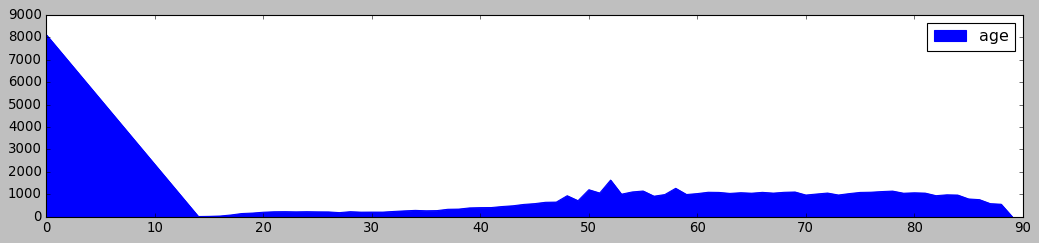

In [10]:
# https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d

plt.style.use('classic')
plt.rcParams['figure.figsize'] = [40/2.54, 8/2.54]
df['age'].value_counts().sort_index().plot.area()
plt.legend()

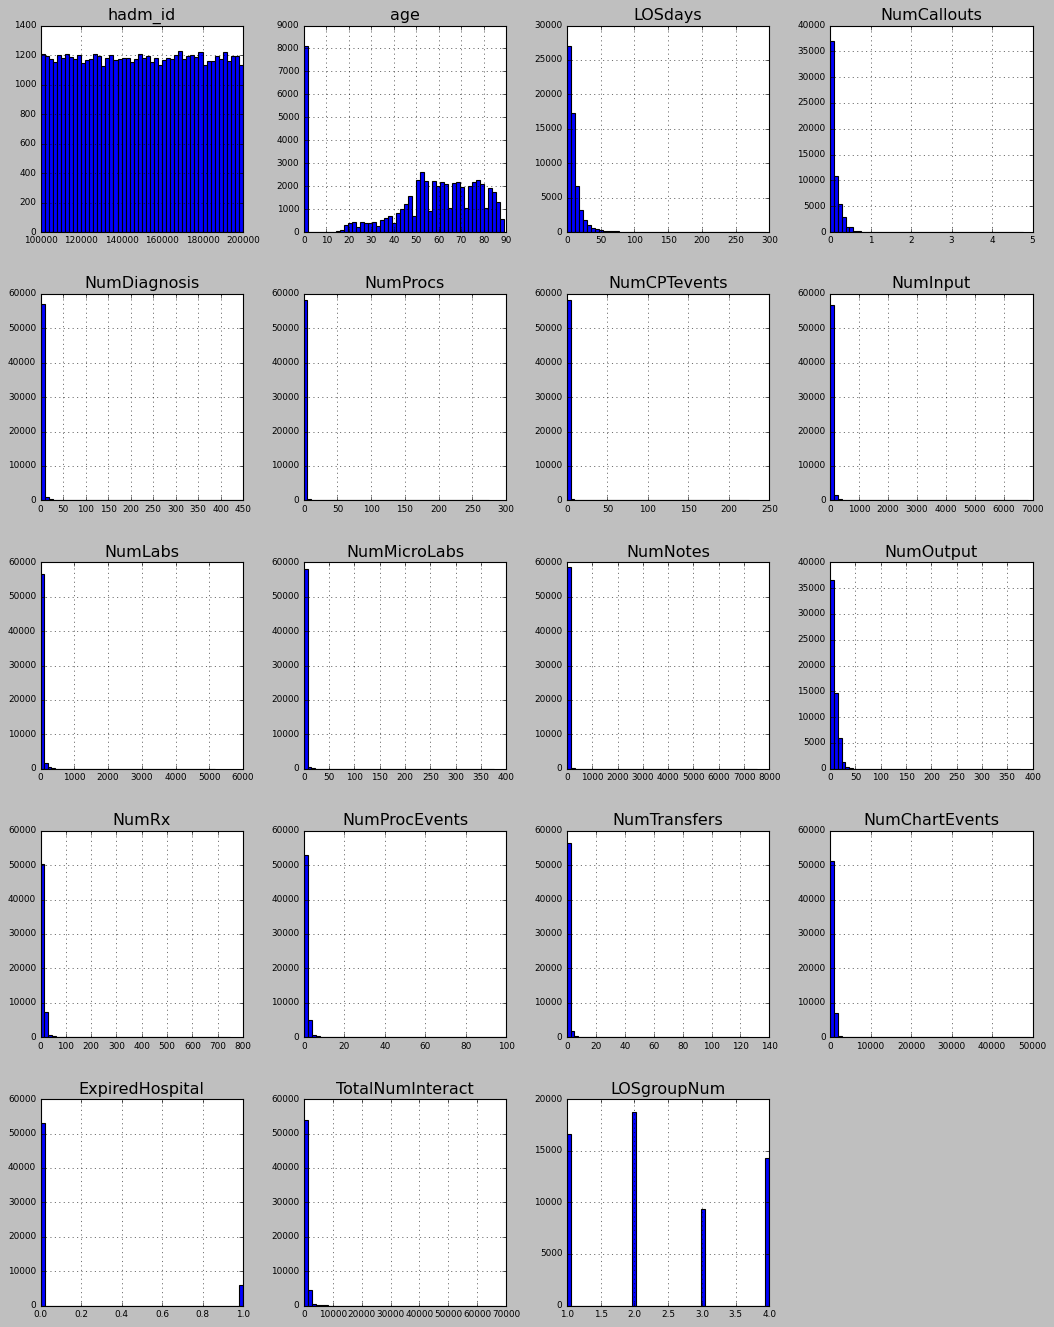

In [11]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose information

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


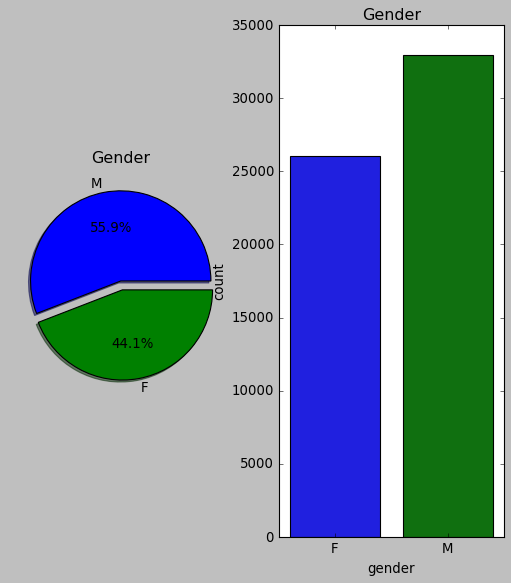

In [12]:
f,ax=plt.subplots(1,2,figsize=(8,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=df,ax=ax[1])
ax[1].set_title('Gender')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


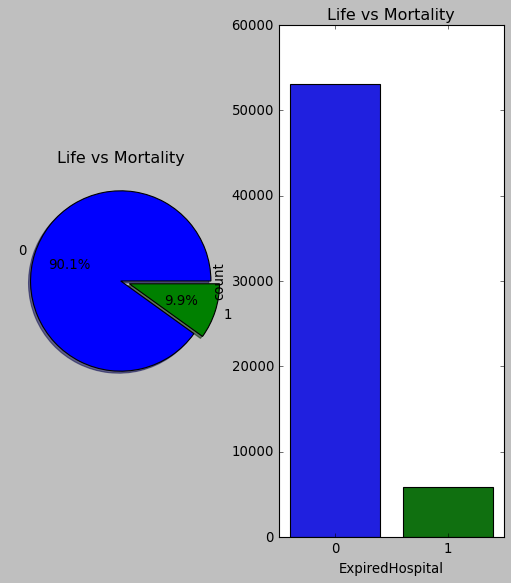

In [13]:
f,ax=plt.subplots(1,2,figsize=(8,8))
df['ExpiredHospital'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Life vs Mortality')
ax[0].set_ylabel('')
sns.countplot('ExpiredHospital',data=df , ax=ax[1])
ax[1].set_title('Life vs Mortality')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


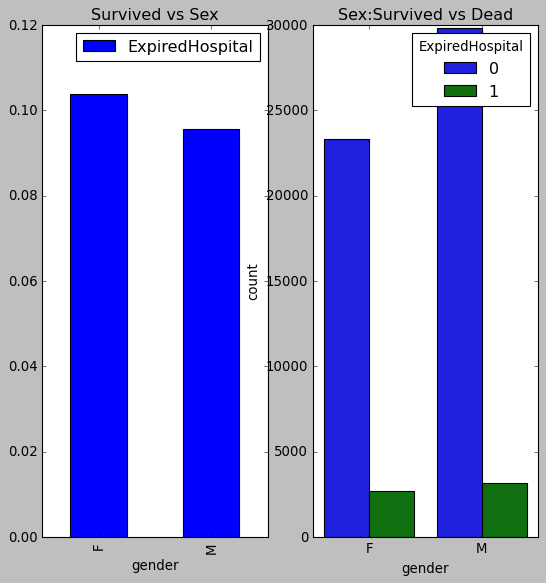

In [14]:
f,ax=plt.subplots(1,2,figsize=(8,8))
df[['gender','ExpiredHospital']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('gender',hue='ExpiredHospital',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()


In [15]:
#https://www.kaggle.com/vsramaraj/keras-functional-modeling-with-multiple-inputs
def plot_count(feature, title,size=1,df=df):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:30], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


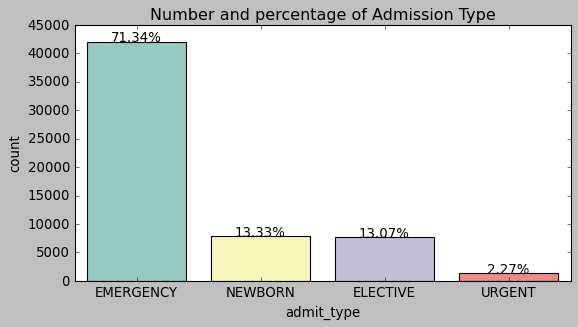

In [16]:
plot_count('admit_type','Admission Type',2)


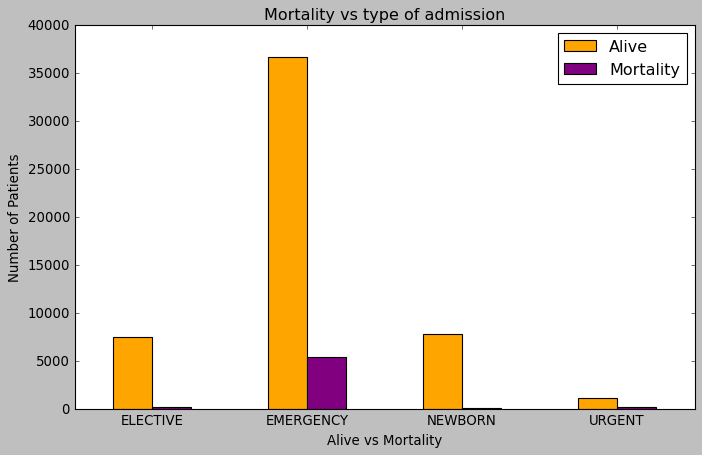

In [17]:
pd.crosstab(df.admit_type, df.ExpiredHospital).plot(kind="bar",
                                figsize=(10, 6),
                                color=["orange", "purple"])
# Add some communication
plt.title("Mortality vs type of admission")
plt.xlabel("Alive vs Mortality")
plt.ylabel("Number of Patients")
plt.legend(["Alive", "Mortality"])
plt.xticks(rotation=0);

<AxesSubplot:>

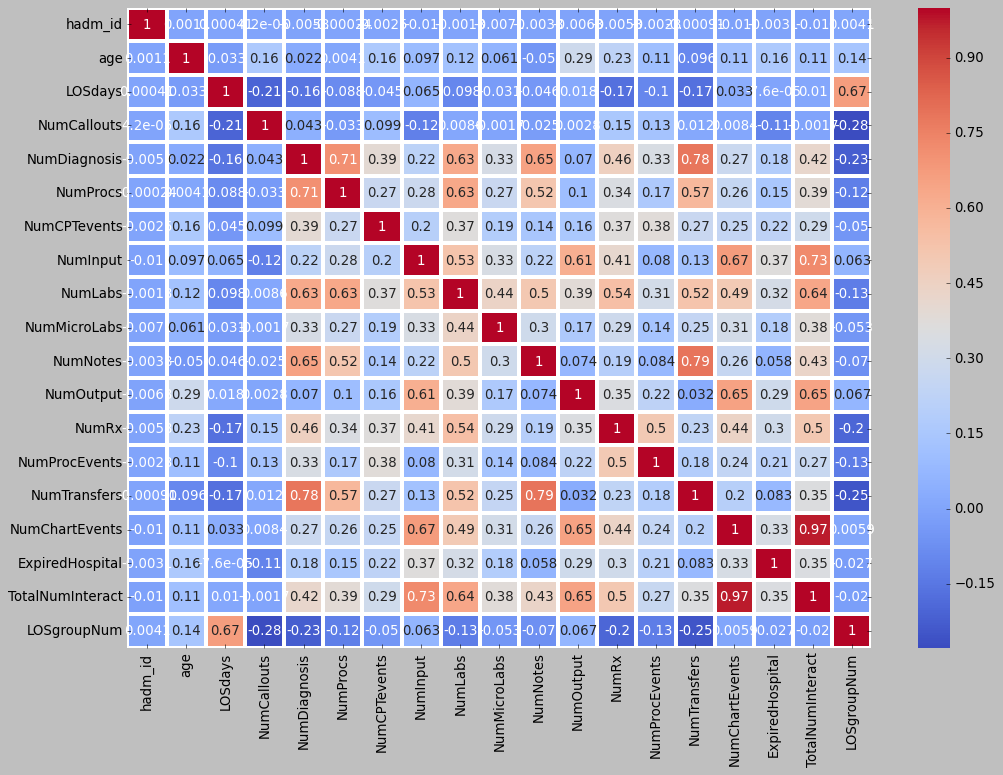

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)


<AxesSubplot:xlabel='ExpiredHospital', ylabel='count'>

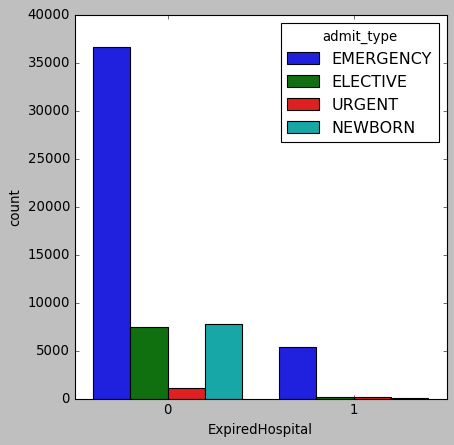

In [19]:
#From kaggle https://www.kaggle.com/mohitcjumani/income-classifier-using-random-forest-classifier
plt.figure(figsize=(6,6))
sns.countplot(x='ExpiredHospital',hue='admit_type',data=df)


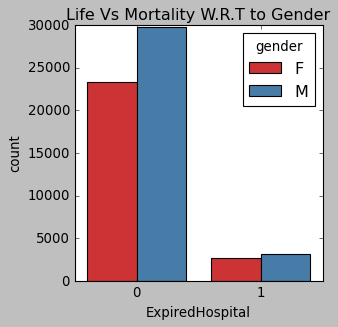

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x='ExpiredHospital',hue='gender',data=df,palette='Set1')
plt.title("Life Vs Mortality W.R.T to Gender")
plt.show()

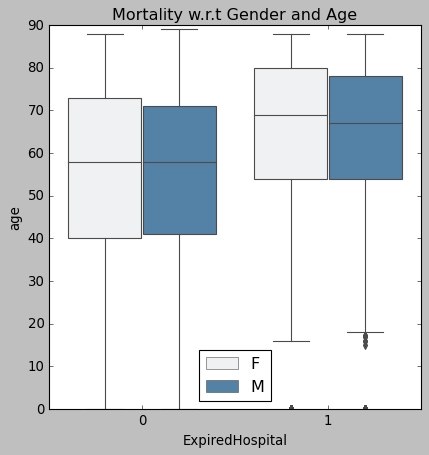

In [21]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x='ExpiredHospital',y='age',hue='gender',color="steelblue", data=df)
ax.set_title("Mortality w.r.t Gender and Age")
ax.legend(loc='best')
plt.show()

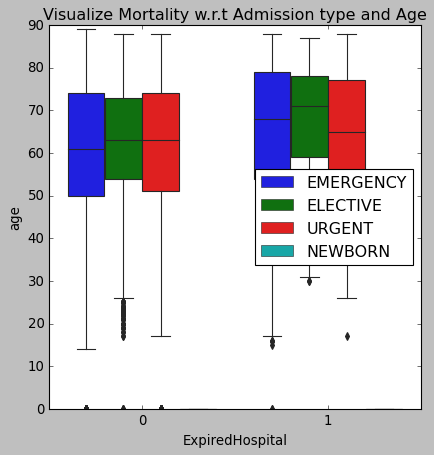

In [22]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x='ExpiredHospital',y='age',hue='admit_type',data=df)
ax.set_title("Visualize Mortality w.r.t Admission type and Age")
ax.legend(loc='best')
plt.show()

In [23]:
outlier_df = df

In [24]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
    
    # define figure size
    plt.figure(figsize=(16, 4))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

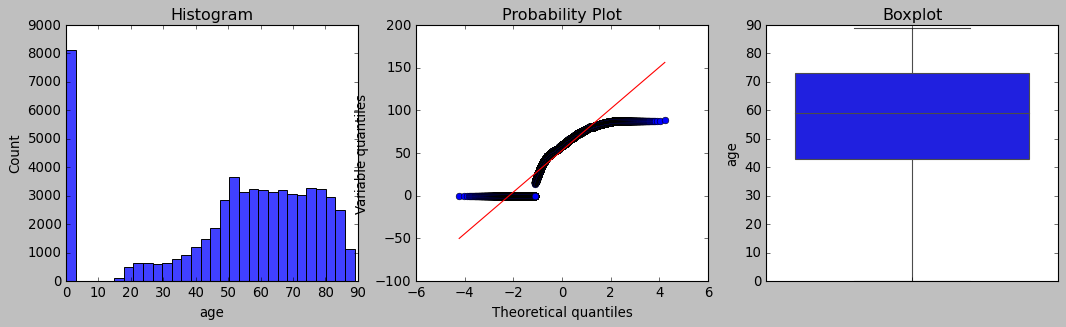

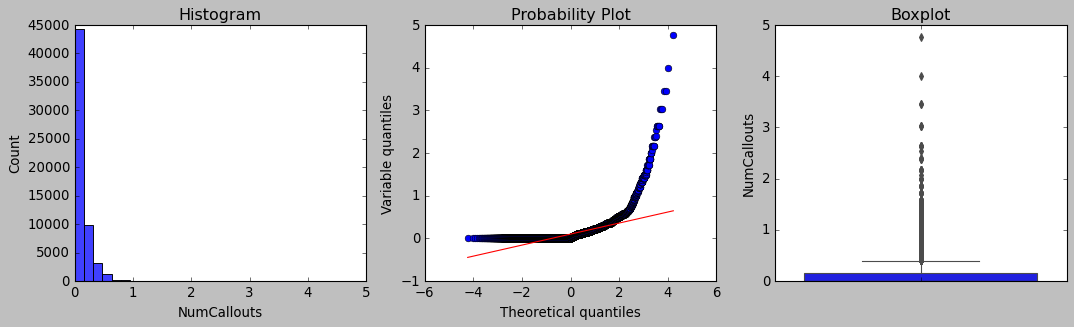

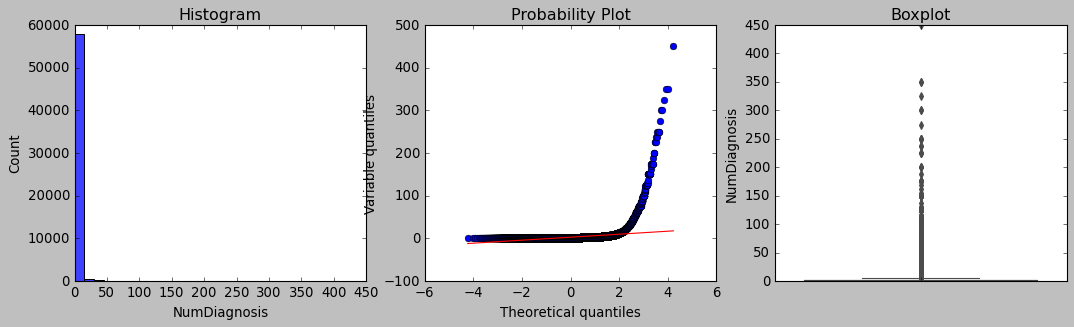

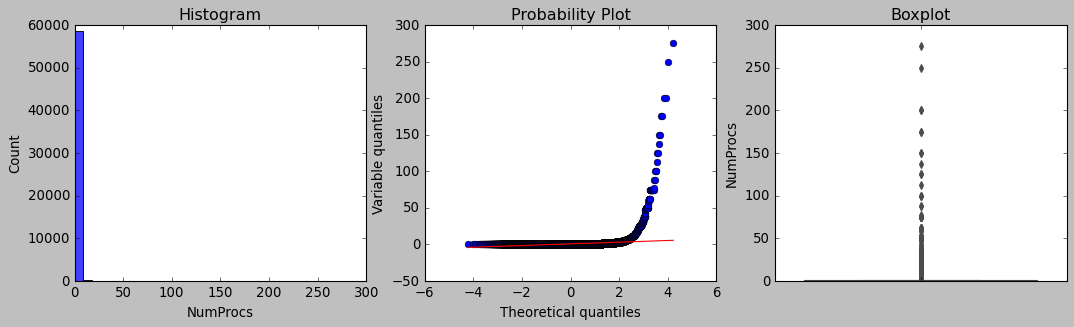

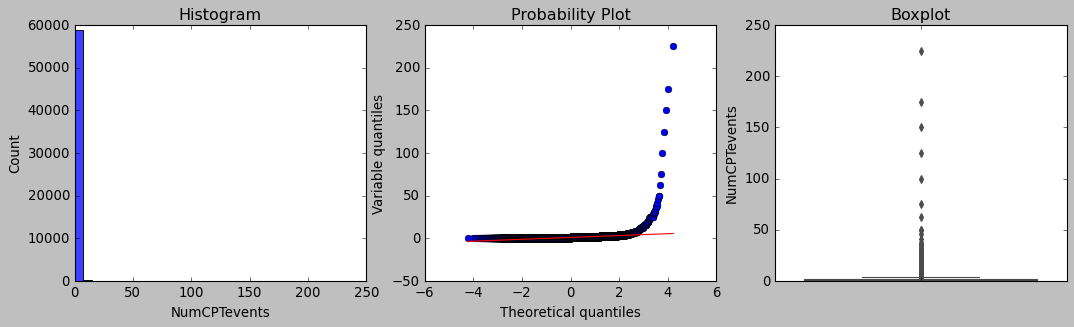

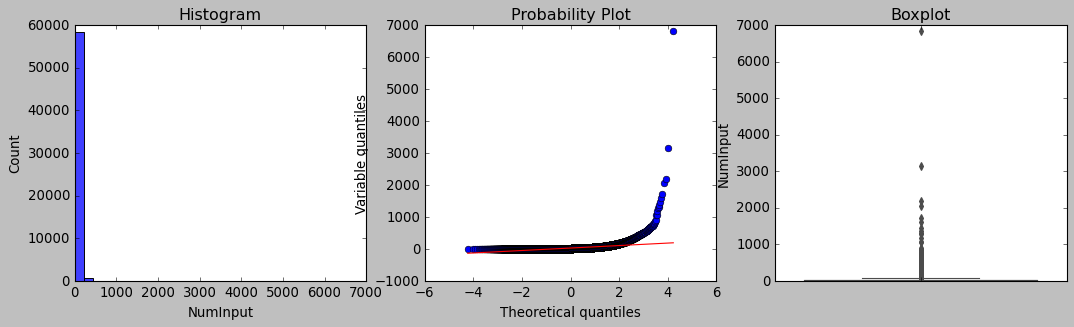

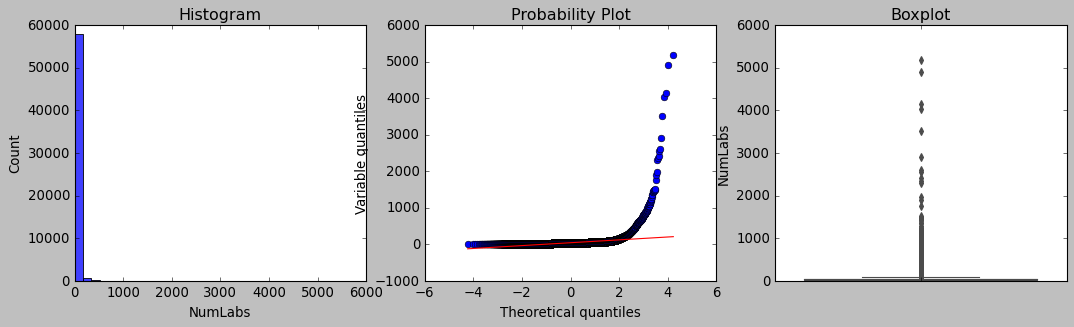

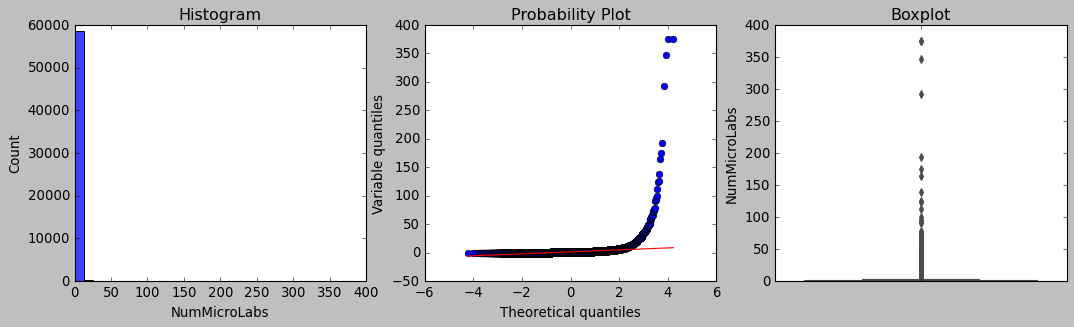

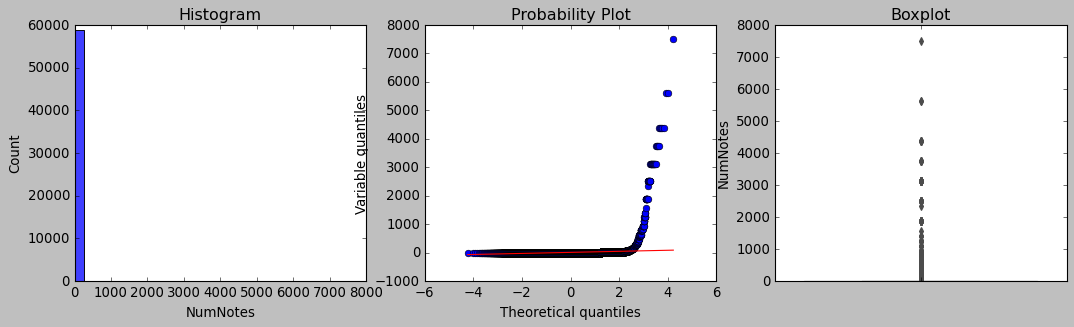

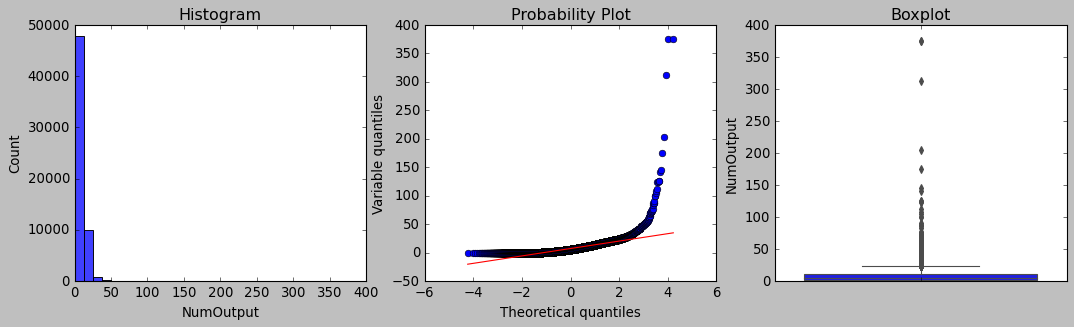

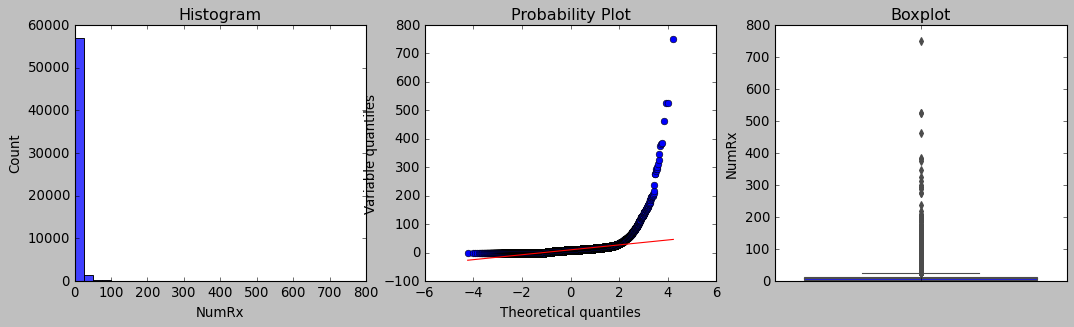

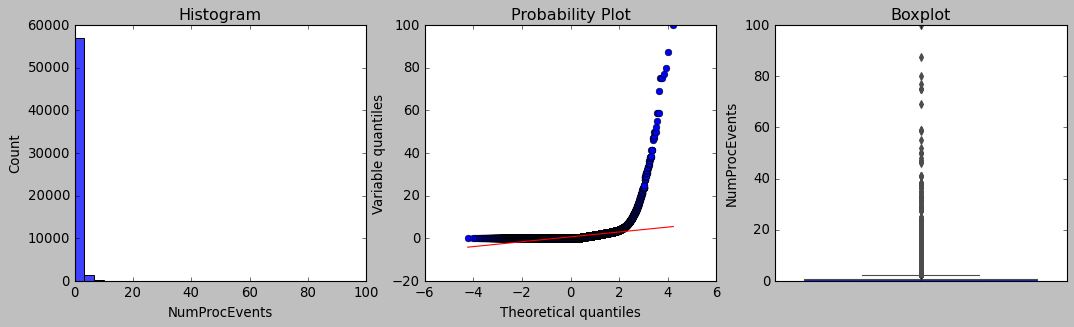

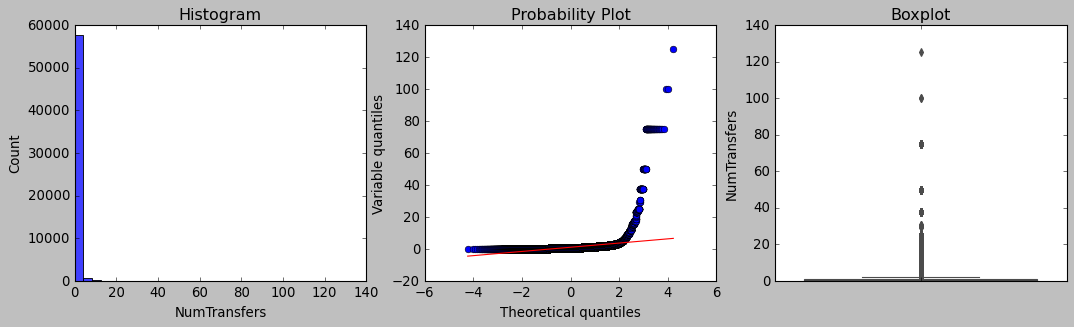

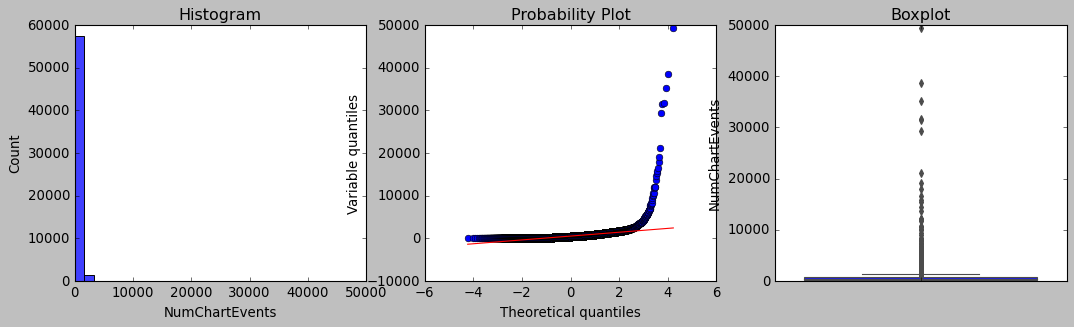

In [25]:
diagnostic_plots(outlier_df, 'age')
diagnostic_plots(outlier_df, 'NumCallouts')
diagnostic_plots(outlier_df, 'NumDiagnosis')
diagnostic_plots(outlier_df, 'NumProcs')
diagnostic_plots(outlier_df, 'NumCPTevents')
diagnostic_plots(outlier_df, 'NumInput')
diagnostic_plots(outlier_df, 'NumLabs')
diagnostic_plots(outlier_df, 'NumMicroLabs')
diagnostic_plots(outlier_df, 'NumNotes')
diagnostic_plots(outlier_df, 'NumOutput')
diagnostic_plots(outlier_df, 'NumRx')
diagnostic_plots(outlier_df, 'NumProcEvents')
diagnostic_plots(outlier_df, 'NumTransfers')
diagnostic_plots(outlier_df, 'NumChartEvents')

In [26]:
def find_skewed_boundaries(df, variable, distance):
    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions
    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary


In [27]:
# find limits for NumCallouts
NumCallouts_upper_limit, NumCallouts_lower_limit = find_skewed_boundaries(outlier_df, 'NumCallouts', 1.5)
NumCallouts_upper_limit, NumCallouts_lower_limit


(0.4, -0.24)

In [28]:
# find limits for NumDiagnosis
NumDiag_upper_limit, NumDiag_lower_limit = find_skewed_boundaries(outlier_df, 'NumDiagnosis', 1.5)
NumDiag_upper_limit, NumDiag_lower_limit

(4.77, -1.5500000000000003)

In [29]:
# find limits for NumProcs
NumProcs_upper_limit, NumProcs_lower_limit = find_skewed_boundaries(outlier_df, 'NumProcs', 1.5)
NumProcs_upper_limit, NumProcs_lower_limit


(1.46, -0.54)

In [30]:
# find limits for NumCPTevents
NumCPTevents_upper_limit, NumCPTevents_lower_limit = find_skewed_boundaries(outlier_df, 'NumCPTevents', 1.5)
NumCPTevents_upper_limit, NumCPTevents_lower_limit

(3.9, -2.34)

In [31]:
# find limits for NumInput
NumInput_upper_limit, NumInput_lower_limit = find_skewed_boundaries(outlier_df, 'NumInput', 1.5)
NumInput_upper_limit, NumInput_lower_limit


(78.625, -39.415)

In [32]:
# find limits for NumLabs
NumLabs_upper_limit, NumLabs_lower_limit = find_skewed_boundaries(outlier_df, 'NumLabs', 1.5)
NumLabs_upper_limit, NumLabs_lower_limit


(86.68, -8.84)

In [33]:
# find limits for NumMicroLabs
NumMicroLabs_upper_limit, NumMicroLabs_lower_limit = find_skewed_boundaries(outlier_df, 'NumMicroLabs', 1.5)
NumMicroLabs_upper_limit, NumMicroLabs_lower_limit


(3.1350000000000002, -1.6250000000000002)

In [34]:
# find limits for NumNotes
NumNotes_upper_limit, NumNotes_lower_limit = find_skewed_boundaries(outlier_df, 'NumNotes', 1.5)
NumNotes_upper_limit, NumNotes_lower_limit

(1.715, -0.805)

In [35]:
# find limits for NumOutput
NumOutput_upper_limit, NumOutput_lower_limit = find_skewed_boundaries(outlier_df, 'NumOutput', 1.5)
NumOutput_upper_limit, NumOutput_lower_limit


(23.6, -11.36)

In [36]:
# find limits for NumRx
NumRx_upper_limit, NumRx_lower_limit = find_skewed_boundaries(outlier_df, 'NumRx', 1.5)
NumRx_upper_limit, NumRx_lower_limit


(24.18, -7.58)

In [37]:
# find limits for NumProcEvents
NumProcEvents_upper_limit, NumProcEvents_lower_limit = find_skewed_boundaries(outlier_df, 'NumProcEvents', 1.5)
NumProcEvents_upper_limit, NumProcEvents_lower_limit


(2.2, -1.32)

In [38]:
# find limits for NumTransfers
NumTransfers_upper_limit, NumTransfers_lower_limit = find_skewed_boundaries(outlier_df, 'NumTransfers', 1.5)
NumTransfers_upper_limit, NumTransfers_lower_limit


(2.08, -0.64)

In [39]:
# find limits for NumChartEvents
NumChartEvents_upper_limit, NumChartEvents_lower_limit = find_skewed_boundaries(outlier_df, 'NumChartEvents', 1.5)
NumChartEvents_upper_limit, NumChartEvents_lower_limit


(1439.6412500000001, -531.9287500000002)

In [40]:
# let's flag the outliers in the data set
outliers_NumCallouts = np.where(outlier_df['NumCallouts'] > NumCallouts_upper_limit, True,
                        np.where(outlier_df['NumCallouts'] < NumCallouts_lower_limit, True, False))
outliers_NumDiagnosis = np.where(outlier_df['NumDiagnosis'] > NumDiag_upper_limit, True,
                        np.where(outlier_df['NumDiagnosis'] < NumDiag_lower_limit, True, False))
outliers_NumProcs = np.where(outlier_df['NumProcs'] > NumProcs_upper_limit, True,
                        np.where(outlier_df['NumProcs'] < NumProcs_lower_limit, True, False))
outliers_NumCPTevents = np.where(outlier_df['NumCPTevents'] > NumCPTevents_upper_limit, True,
                        np.where(outlier_df['NumCPTevents'] < NumCPTevents_lower_limit, True, False))
outliers_NumInput = np.where(outlier_df['NumInput'] > NumInput_upper_limit, True,
                        np.where(outlier_df['NumInput'] < NumInput_lower_limit, True, False))
outliers_NumLabs = np.where(outlier_df['NumLabs'] > NumLabs_upper_limit, True,
                        np.where(outlier_df['NumLabs'] < NumLabs_lower_limit, True, False))
outliers_NumMicroLabs = np.where(outlier_df['NumMicroLabs'] > NumMicroLabs_upper_limit, True,
                        np.where(outlier_df['NumMicroLabs'] < NumMicroLabs_lower_limit, True, False))
outliers_NumNotes = np.where(outlier_df['NumNotes'] > NumNotes_upper_limit, True,
                        np.where(outlier_df['NumNotes'] < NumNotes_lower_limit, True, False))
outliers_NumOutput = np.where(outlier_df['NumOutput'] > NumOutput_upper_limit, True,
                        np.where(outlier_df['NumOutput'] < NumOutput_lower_limit, True, False))
outliers_NumRx = np.where(outlier_df['NumRx'] > NumRx_upper_limit, True,
                    np.where(outlier_df['NumRx'] < NumRx_lower_limit, True, False))
outliers_NumProcEvents = np.where(outlier_df['NumProcEvents'] > NumProcEvents_upper_limit, True,
                            np.where(outlier_df['NumProcEvents'] < NumProcEvents_lower_limit, True, False))
outliers_NumTransfers = np.where(outlier_df['NumTransfers'] > NumTransfers_upper_limit, True,
                        np.where(outlier_df['NumTransfers'] < NumTransfers_lower_limit, True, False))
outliers_NumChartEvents = np.where(outlier_df['NumChartEvents'] > NumChartEvents_upper_limit, True,
                        np.where(outlier_df['NumChartEvents'] < NumChartEvents_lower_limit, True, False))


In [41]:
# let's trimm the dataset
outliers_trimmed = outlier_df.loc[~(outliers_NumCallouts + outliers_NumDiagnosis + outliers_NumProcs + outliers_NumCPTevents
                                    + outliers_NumInput + outliers_NumLabs + outliers_NumMicroLabs + outliers_NumNotes
                                    + outliers_NumOutput + outliers_NumRx + outliers_NumProcEvents + outliers_NumTransfers
                                    + outliers_NumChartEvents), ]
outlier_df.shape, outliers_trimmed.shape


((58976, 28), (38753, 28))

In [42]:
#Alternative way for outliers
outlier_l = df

In [43]:
# find limits for NumCallouts
NumCallouts_upper_limit, NumCallouts_lower_limit = find_skewed_boundaries(outlier_l, 'NumCallouts', 1.5)
NumCallouts_upper_limit, NumCallouts_lower_limit


(0.4, -0.24)

In [44]:
# find limits for NumDiagnosis
NumDiag_upper_limit, NumDiag_lower_limit = find_skewed_boundaries(outlier_l, 'NumDiagnosis', 1.5)
NumDiag_upper_limit, NumDiag_lower_limit

(4.77, -1.5500000000000003)

In [45]:
# find limits for NumProcs
NumProcs_upper_limit, NumProcs_lower_limit = find_skewed_boundaries(outlier_l, 'NumProcs', 1.5)
NumProcs_upper_limit, NumProcs_lower_limit


(1.46, -0.54)

In [46]:
# find limits for NumCPTevents
NumCPTevents_upper_limit, NumCPTevents_lower_limit = find_skewed_boundaries(outlier_l, 'NumCPTevents', 1.5)
NumCPTevents_upper_limit, NumCPTevents_lower_limit


(3.9, -2.34)

In [47]:
# find limits for NumInput
NumInput_upper_limit, NumInput_lower_limit = find_skewed_boundaries(outlier_l, 'NumInput', 1.5)
NumInput_upper_limit, NumInput_lower_limit


(78.625, -39.415)

In [48]:
# find limits for NumLabs
NumLabs_upper_limit, NumLabs_lower_limit = find_skewed_boundaries(outlier_l, 'NumLabs', 1.5)
NumLabs_upper_limit, NumLabs_lower_limit


(86.68, -8.84)

In [49]:
# find limits for NumMicroLabs
NumMicroLabs_upper_limit, NumMicroLabs_lower_limit = find_skewed_boundaries(outlier_l, 'NumMicroLabs', 1.5)
NumMicroLabs_upper_limit, NumMicroLabs_lower_limit

(3.1350000000000002, -1.6250000000000002)

In [50]:
# find limits for NumNotes
NumNotes_upper_limit, NumNotes_lower_limit = find_skewed_boundaries(outlier_l, 'NumNotes', 1.5)
NumNotes_upper_limit, NumNotes_lower_limit

(1.715, -0.805)

In [51]:
# find limits for NumOutput
NumOutput_upper_limit, NumOutput_lower_limit = find_skewed_boundaries(outlier_l, 'NumOutput', 1.5)
NumOutput_upper_limit, NumOutput_lower_limit


(23.6, -11.36)

In [52]:
# find limits for NumRx
NumRx_upper_limit, NumRx_lower_limit = find_skewed_boundaries(outlier_l, 'NumRx', 1.5)
NumRx_upper_limit, NumRx_lower_limit

(24.18, -7.58)

In [53]:
# find limits for NumProcEvents
NumProcEvents_upper_limit, NumProcEvents_lower_limit = find_skewed_boundaries(outlier_l, 'NumProcEvents', 1.5)
NumProcEvents_upper_limit, NumProcEvents_lower_limit

(2.2, -1.32)

In [54]:
# find limits for NumTransfers
NumTransfers_upper_limit, NumTransfers_lower_limit = find_skewed_boundaries(outlier_l, 'NumTransfers', 1.5)
NumTransfers_upper_limit, NumTransfers_lower_limit


(2.08, -0.64)

In [55]:
# find limits for NumChartEvents
NumChartEvents_upper_limit, NumChartEvents_lower_limit = find_skewed_boundaries(outlier_l, 'NumChartEvents', 1.5)
NumChartEvents_upper_limit, NumChartEvents_lower_limit

(1439.6412500000001, -531.9287500000002)

In [56]:
# find limits for RM
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(outlier_l, 'NumInput', 1.5)
RM_upper_limit, RM_lower_limit

(78.625, -39.415)

In [57]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumCallouts']= np.where(outlier_l['NumCallouts'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumCallouts'] < RM_lower_limit, RM_lower_limit, outlier_l['NumCallouts']))

In [58]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumDiagnosis']= np.where(outlier_l['NumDiagnosis'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumDiagnosis'] < RM_lower_limit, RM_lower_limit, outlier_l['NumDiagnosis']))

In [59]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumProcs']= np.where(outlier_l['NumProcs'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumProcs'] < RM_lower_limit, RM_lower_limit, outlier_l['NumProcs']))

In [60]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumCPTevents']= np.where(outlier_l['NumCPTevents'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumCPTevents'] < RM_lower_limit, RM_lower_limit, outlier_l['NumCPTevents']))

In [61]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumInput']= np.where(outlier_l['NumInput'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumInput'] < RM_lower_limit, RM_lower_limit, outlier_l['NumInput']))

In [62]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumLabs']= np.where(outlier_l['NumLabs'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumLabs'] < RM_lower_limit, RM_lower_limit, outlier_l['NumLabs']))


In [63]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumMicroLabs']= np.where(outlier_l['NumMicroLabs'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumMicroLabs'] < RM_lower_limit, RM_lower_limit, outlier_l['NumMicroLabs']))

In [64]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumNotes']= np.where(outlier_l['NumNotes'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumNotes'] < RM_lower_limit, RM_lower_limit, outlier_l['NumNotes']))

In [65]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumOutput']= np.where(outlier_l['NumOutput'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumOutput'] < RM_lower_limit, RM_lower_limit, outlier_l['NumOutput']))

In [66]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumRx']= np.where(outlier_l['NumRx'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumRx'] < RM_lower_limit, RM_lower_limit, outlier_l['NumRx']))

In [67]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumProcEvents']= np.where(outlier_l['NumProcEvents'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumProcEvents'] < RM_lower_limit, RM_lower_limit, outlier_l['NumProcEvents']))

In [68]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumTransfers']= np.where(outlier_l['NumTransfers'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumTransfers'] < RM_lower_limit, RM_lower_limit, outlier_l['NumTransfers']))

In [69]:
# Now let's replace the outliers by the maximum and minimum limit
outlier_l['NumChartEvents']= np.where(outlier_l['NumChartEvents'] > RM_upper_limit, RM_upper_limit,
np.where(outlier_l['NumChartEvents'] < RM_lower_limit, RM_lower_limit, outlier_l['NumChartEvents']))

In [70]:
df = outlier_l


In [71]:
mylist=df.loc[:, df.dtypes == np.object]

for col in mylist.columns:
    print(col, ': ', len(mylist[col].unique()), ' labels')


gender :  2  labels
admit_type :  4  labels
admit_location :  9  labels
AdmitDiagnosis :  15692  labels
insurance :  5  labels
religion :  21  labels
marital_status :  8  labels
ethnicity :  41  labels
AdmitProcedure :  1277  labels


C:\Users\ASUS\AppData\Local\Temp/ipykernel_13952/898953147.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mylist=df.loc[:, df.dtypes == np.object]


In [72]:
df.drop(['admit_location','religion','AdmitProcedure','marital_status','hadm_id','insurance'], axis = 1,inplace = True)

In [73]:
df.head(2)

,gender,age,LOSdays,admit_type,AdmitDiagnosis,ethnicity,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,6.17,EMERGENCY,DIABETIC KETOACIDOSIS,WHITE,0.16,2.59,0.00,1.30,...,0.65,0.05,5.19,14.91,1.13,0.65,78.625,0,493.89,2
1,M,59,4.04,EMERGENCY,UPPER GI BLEED,WHITE,0.25,2.23,0.99,1.98,...,1.24,1.59,5.45,7.18,0.99,1.24,78.625,0,465.71,2


In [74]:
df[df['AdmitDiagnosis'].isna()]

,gender,age,LOSdays,admit_type,AdmitDiagnosis,ethnicity,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
3553,F,48,0.58,ELECTIVE,NaN,UNKNOWN/NOT SPECIFIED,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,1.72,0.000,0,1.72,1
6254,M,66,0.54,ELECTIVE,NaN,WHITE,0.00,3.70,1.85,0.00,...,0.000,0.00,0.00,0.00,0.0,1.85,0.000,0,7.40,1
6880,M,77,0.50,ELECTIVE,NaN,WHITE,0.00,10.00,4.00,2.00,...,0.000,4.00,0.00,0.00,0.0,2.00,0.000,0,22.00,1
7689,F,58,0.46,ELECTIVE,NaN,WHITE,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,2.17,0.000,0,2.17,1
10060,F,56,0.63,ELECTIVE,NaN,ASIAN,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,1.59,0.000,0,1.59,1
15837,M,30,1.42,EMERGENCY,NaN,WHITE,0.00,0.00,0.00,0.70,...,78.625,1.49,11.97,0.00,0.0,0.70,78.625,1,1097.25,1
21017,F,65,0.71,EMERGENCY,NaN,WHITE,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.0,1.41,38.030,0,136.62,1
21259,M,57,0.71,EMERGENCY,NaN,WHITE,0.00,5.63,1.41,0.00,...,0.000,0.00,0.00,0.00,0.0,1.41,0.000,0,8.45,1
22158,F,42,12.00,URGENT,NaN,WHITE,0.00,0.75,0.17,0.00,...,0.000,0.06,2.83,0.00,0.0,0.08,78.625,0,225.72,4
22585,F,66,0.46,ELECTIVE,NaN,WHITE,0.00,8.70,8.70,0.00,...,0.000,0.00,0.00,0.00,0.0,2.17,0.000,0,19.57,1


In [75]:
df['AdmitDiagnosis'] = df['AdmitDiagnosis'].replace(np.nan, 'NOT SPECIFIED')

In [76]:
mylist=df.loc[:, df.dtypes == np.object]

for col in mylist.columns:
    print(col, ': ', len(mylist[col].unique()), ' labels')


C:\Users\ASUS\AppData\Local\Temp/ipykernel_13952/898953147.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mylist=df.loc[:, df.dtypes == np.object]


gender :  2  labels
admit_type :  4  labels
AdmitDiagnosis :  15692  labels
ethnicity :  41  labels


In [77]:
df.drop(['ethnicity'], axis = 1,inplace = True)


In [78]:
df.head(2)

,gender,age,LOSdays,admit_type,AdmitDiagnosis,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,6.17,EMERGENCY,DIABETIC KETOACIDOSIS,0.16,2.59,0.00,1.30,25.12,...,0.65,0.05,5.19,14.91,1.13,0.65,78.625,0,493.89,2
1,M,59,4.04,EMERGENCY,UPPER GI BLEED,0.25,2.23,0.99,1.98,13.61,...,1.24,1.59,5.45,7.18,0.99,1.24,78.625,0,465.71,2


In [79]:
AD= df['AdmitDiagnosis'].value_counts().head(20)

In [80]:
print(AD)

NEWBORN                                                      7823
PNEUMONIA                                                    1566
SEPSIS                                                       1184
CONGESTIVE HEART FAILURE                                      928
CORONARY ARTERY DISEASE                                       840
CHEST PAIN                                                    778
INTRACRANIAL HEMORRHAGE                                       713
ALTERED MENTAL STATUS                                         712
GASTROINTESTINAL BLEED                                        686
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA     583
UPPER GI BLEED                                                580
ABDOMINAL PAIN                                                554
FEVER                                                         510
DIABETIC KETOACIDOSIS                                         462
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA      450
S/P FALL  

In [81]:
kw = ['NEWBORN','PNEUMONIA','SEPSIS','CONGESTIVE HEART FAILURE','CORONARY ARTERY DISEASE','CORONARY ARTERY DISEASE' , 'CHEST PAIN', 'INTRACRANIAL HEMORRHAGE', 'ALTERED MENTAL STATUS', 'GASTROINTESTINAL BLEED', 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA','UPPER GI BLEED', 'ABDOMINAL PAIN', 'FEVER','DIABETIC KETOACIDOSIS', 'CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA',  'S/P FALL', 'LOWER GI BLEED','LOWER GI BLEED', 'SUBARACHNOID HEMORRHAGE','HYPOTENSION','STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK']

In [82]:
df['AdmitDiagnosis'] = df['AdmitDiagnosis'].apply(lambda x: x if x in kw else 'Others')


In [83]:
df['AdmitDiagnosis'].unique()


array(['DIABETIC KETOACIDOSIS', 'UPPER GI BLEED', 'Others',
       'CORONARY ARTERY DISEASE', 'PNEUMONIA', 'NEWBORN',
       'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA',
       'CHEST PAIN', 'ABDOMINAL PAIN',
       'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA',
       'HYPOTENSION', 'INTRACRANIAL HEMORRHAGE', 'GASTROINTESTINAL BLEED',
       'CONGESTIVE HEART FAILURE', 'FEVER', 'S/P FALL', 'LOWER GI BLEED',
       'SEPSIS', 'ALTERED MENTAL STATUS', 'SUBARACHNOID HEMORRHAGE',
       'STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK'], dtype=object)

In [84]:
mylist=df.loc[:, df.dtypes == np.object]

for col in mylist.columns:
    print(col, ': ', len(mylist[col].unique()), ' labels')

gender :  2  labels
admit_type :  4  labels
AdmitDiagnosis :  21  labels


C:\Users\ASUS\AppData\Local\Temp/ipykernel_13952/2488463603.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mylist=df.loc[:, df.dtypes == np.object]


In [85]:
df = pd.get_dummies(prefix='Mimic',data=df,columns=['admit_type','AdmitDiagnosis','gender'])


In [86]:
df.columns

Index(['age', 'LOSdays', 'NumCallouts', 'NumDiagnosis', 'NumProcs',
       'NumCPTevents', 'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes',
       'NumOutput', 'NumRx', 'NumProcEvents', 'NumTransfers', 'NumChartEvents',
       'ExpiredHospital', 'TotalNumInteract', 'LOSgroupNum', 'Mimic_ELECTIVE',
       'Mimic_EMERGENCY', 'Mimic_NEWBORN', 'Mimic_URGENT',
       'Mimic_ABDOMINAL PAIN', 'Mimic_ALTERED MENTAL STATUS',
       'Mimic_CHEST PAIN', 'Mimic_CONGESTIVE HEART FAILURE',
       'Mimic_CORONARY ARTERY DISEASE',
       'Mimic_CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA',
       'Mimic_CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA',
       'Mimic_DIABETIC KETOACIDOSIS', 'Mimic_FEVER',
       'Mimic_GASTROINTESTINAL BLEED', 'Mimic_HYPOTENSION',
       'Mimic_INTRACRANIAL HEMORRHAGE', 'Mimic_LOWER GI BLEED',
       'Mimic_NEWBORN', 'Mimic_Others', 'Mimic_PNEUMONIA', 'Mimic_S/P FALL',
       'Mimic_SEPSIS', 'Mimic_STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK',
 

In [87]:
df.drop(['Mimic_M'], axis = 1,inplace = True)

In [88]:
X = df.drop(["ExpiredHospital"],axis=1) 
y = df["ExpiredHospital"]

In [89]:
X.shape


(58976, 43)

In [90]:
y.shape

(58976,)

In [91]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge #Ridge
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

column_names_list=[]
column_names=np.array(df.columns)
chi_features = SelectKBest(chi2, k=16).fit(X, y).get_support()   #chi
anova_features = SelectKBest(f_classif, k=11).fit(X, y).get_support() #anova
column_names_list.extend(column_names[np.where(chi_features)])
column_names_list.extend(column_names[np.where(anova_features)])

sfs = SequentialFeatureSelector(estimator = rfc, scoring= "accuracy",cv = 5)
sfs.fit(X, y)
sfs.get_support()
sfs2 = SequentialFeatureSelector(estimator = rfc, direction="backward",scoring= "accuracy",cv = 5,n_jobs=-1)
sfs2.fit(X, y)
sfs2.get_support()
column_names_list.extend(column_names[np.where(sfs.get_support())])
column_names_list.extend(column_names[np.where(sfs2.get_support())])

skf=StratifiedKFold(n_splits=10)
scaler=StandardScaler() #ridge
lasso=LassoCV(cv=skf)
lasso.fit(X,y)
ridge= Ridge(alpha=1.0)
ridge.fit(X,y) #ridge
column_names_list.extend(column_names[np.where(lasso.coef_!=0)])
column_names_list.extend(column_names[np.where(ridge.coef_>=0)])


column_names_df=pd.DataFrame(column_names_list,columns=["column_names"])
column_names_df.value_counts()


column_names                                                   
ExpiredHospital                                                    6
NumInput                                                           6
NumNotes                                                           6
NumLabs                                                            6
NumRx                                                              5
NumProcEvents                                                      5
age                                                                5
Mimic_EMERGENCY                                                    4
NumProcs                                                           4
NumCPTevents                                                       4
NumOutput                                                          4
NumMicroLabs                                                       4
NumDiagnosis                                                       3
NumChartEvents                         

In [92]:
column_counts=column_names_df.value_counts().reset_index().rename(columns={0:"counts"})
newx_column_names=column_counts["column_names"][1:11].tolist()
newx_column_names

['NumInput',
 'NumNotes',
 'NumLabs',
 'NumRx',
 'NumProcEvents',
 'age',
 'Mimic_EMERGENCY',
 'NumProcs',
 'NumCPTevents',
 'NumOutput']

In [113]:
newX = df[newx_column_names]
y = df["ExpiredHospital"]

In [114]:
newX.shape

(58976, 10)

In [95]:
y.shape

(58976,)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
xtrain,xtest,ytrain,ytest=train_test_split(newX,y,test_size=0.3)
xtrain.shape,xtest.shape

((41283, 10), (17693, 10))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of train data: 0.9230204035494263
Accuracy of test data: 0.9250296732311121
Confusion matrix:
 [[15744  1198]
 [  164   587]]
Accuracy: 0.9230204035494263
sensitivity/Recall:  0.9292881596033526
precision:  0.9896907216494846
specificity:  0.7816245006657789
F1 score: 0.9585388127853882
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     16942
           1       0.33      0.78      0.46       751

    accuracy                           0.92     17693
   macro avg       0.66      0.86      0.71     17693
weighted avg       0.96      0.92      0.94     17693

accuracy:  0.9230204035494263
confusion matrix:  [[15744  1198]
 [  164   587]]


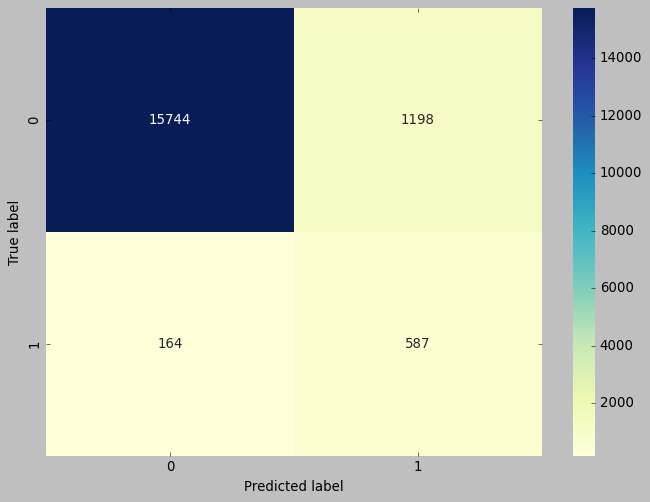

In [97]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
y_train_pred=lr.predict(xtrain)
print("Accuracy of train data:",accuracy_score(ypred,ytest))
print("Accuracy of test data:",accuracy_score(y_train_pred,ytrain))
print("Confusion matrix:\n",confusion_matrix(ypred,ytest))
var=confusion_matrix(ypred,ytest)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(var, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicted label')
plt.ylabel('True label')
print("Accuracy:" ,((var[0,0]+var[1,1])/(var[0,0]+var[0,1]+var[1,0]+var[1,1])))
print("sensitivity/Recall: ",var[0,0]/(var[0,0]+var[0,1]))
print("precision: ",var[0,0]/(var[0,0]+var[1,0]))
print("specificity: ",var[1,1]/(var[1,0]+var[1,1]))
p = var[0,0]/(var[0,0]+var[1,0])
r = var[0,0]/(var[0,0]+var[0,1])
c = 2*((p*r)/(p+r))
print("F1 score:",c)

print(classification_report(ypred , ytest))
print("accuracy: ",accuracy_score(ypred , ytest))
print("confusion matrix: ",confusion_matrix(ypred,ytest))



In [98]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
xtrain,xtest,ytrain,ytest=train_test_split(newX,y,test_size=0.3)
xtrain.shape,xtest.shape

((41283, 10), (17693, 10))

Accuracy of train data: 0.9256768213417735
Accuracy of test data: 0.9379163335997869
Confusion matrix:
 [[15655  1021]
 [  294   723]]
sensitivity/Recall:  0.9387742863996162
precision:  0.9815662423976425
specificity:  0.7109144542772862
F1 score: 0.9596934865900383
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     16676
           1       0.41      0.71      0.52      1017

    accuracy                           0.93     17693
   macro avg       0.70      0.82      0.74     17693
weighted avg       0.95      0.93      0.93     17693

accuracy:  0.9256768213417735
confusion matrix:  [[15655  1021]
 [  294   723]]


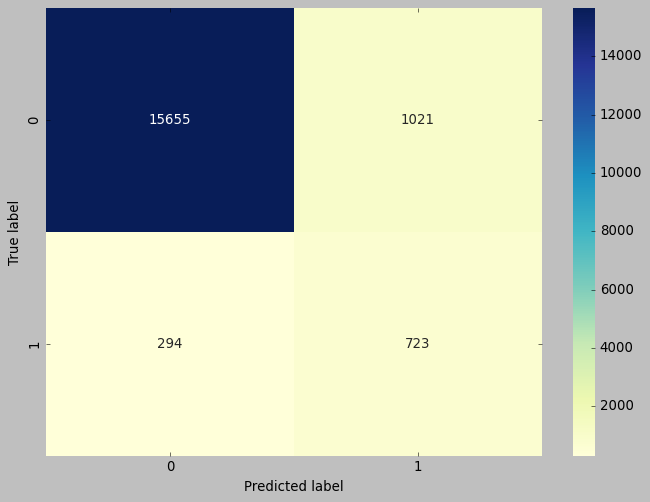

In [99]:
knn=KNeighborsClassifier(n_jobs=-1)
knn.fit(xtrain, ytrain)
ypred=knn.predict(xtest)
knn.score(xtest,ytest)
y_train_pred=knn.predict(xtrain)
print("Accuracy of train data:",accuracy_score(ypred,ytest))
print("Accuracy of test data:",accuracy_score(y_train_pred,ytrain))
print("Confusion matrix:\n",confusion_matrix(ypred,ytest))
var=confusion_matrix(ypred,ytest)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(var, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicted label')
plt.ylabel('True label')
print("Accuracy:" ,((var[0,0]+var[1,1])/(var[0,0]+var[0,1]+var[1,0]+var[1,1])))
print("sensitivity/Recall: ",var[0,0]/(var[0,0]+var[0,1]))
print("precision: ",var[0,0]/(var[0,0]+var[1,0]))
print("specificity: ",var[1,1]/(var[1,0]+var[1,1]))
p = var[0,0]/(var[0,0]+var[1,0])
r = var[0,0]/(var[0,0]+var[0,1])
c = 2*((p*r)/(p+r))
print("F1 score:",c)

print(classification_report(ypred , ytest))
print("accuracy: ",accuracy_score(ypred , ytest))
print("confusion matrix: ",confusion_matrix(ypred,ytest))



In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
xtrain,xtest,ytrain,ytest=train_test_split(newX,y,test_size=0.3)
xtrain.shape,xtest.shape

((41283, 10), (17693, 10))

Accuracy of train data: 0.9280506414966371
Accuracy of test data: 0.9276942082697478
Confusion matrix:
 [[15702   994]
 [  279   718]]
sensitivity/Recall:  0.9404647819837086
precision:  0.9825417683499156
specificity:  0.720160481444333
F1 score: 0.9610429353979864
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     16696
           1       0.42      0.72      0.53       997

    accuracy                           0.93     17693
   macro avg       0.70      0.83      0.75     17693
weighted avg       0.95      0.93      0.94     17693

accuracy:  0.9280506414966371
confusion matrix:  [[15702   994]
 [  279   718]]


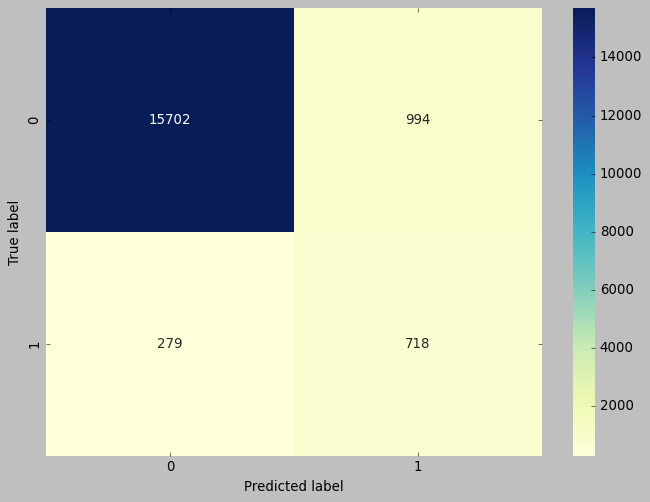

In [101]:
tree=DecisionTreeClassifier(random_state=42,ccp_alpha=0.00063)
tree.fit(xtrain, ytrain)
ypred=tree.predict(xtest)
y_train_pred=tree.predict(xtrain)
print("Accuracy of train data:",accuracy_score(ypred,ytest))
print("Accuracy of test data:",accuracy_score(y_train_pred,ytrain))
print("Confusion matrix:\n",confusion_matrix(ypred,ytest))
var=confusion_matrix(ypred,ytest)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(var, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicted label')
plt.ylabel('True label')
print("Accuracy:" ,((var[0,0]+var[1,1])/(var[0,0]+var[0,1]+var[1,0]+var[1,1])))
print("sensitivity/Recall: ",var[0,0]/(var[0,0]+var[0,1]))
print("precision: ",var[0,0]/(var[0,0]+var[1,0]))
print("specificity: ",var[1,1]/(var[1,0]+var[1,1]))
p = var[0,0]/(var[0,0]+var[1,0])
r = var[0,0]/(var[0,0]+var[0,1])
c = 2*((p*r)/(p+r))
print("F1 score:",c)

print(classification_report(ypred , ytest))
print("accuracy: ",accuracy_score(ypred , ytest))
print("confusion matrix: ",confusion_matrix(ypred,ytest))

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
xtrain,xtest,ytrain,ytest=train_test_split(newX,y,test_size=0.3)
xtrain.shape,xtest.shape

((41283, 10), (17693, 10))

Accuracy of train data: 0.9244899112643419
Accuracy of test data: 0.929220260155512
Confusion matrix:
 [[15636  1065]
 [  271   721]]
sensitivity/Recall:  0.9362313633914137
precision:  0.9829634751995977
specificity:  0.7268145161290323
F1 score: 0.9590284592737979
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     16701
           1       0.40      0.73      0.52       992

    accuracy                           0.92     17693
   macro avg       0.69      0.83      0.74     17693
weighted avg       0.95      0.92      0.93     17693

accuracy:  0.9244899112643419
confusion matrix:  [[15636  1065]
 [  271   721]]


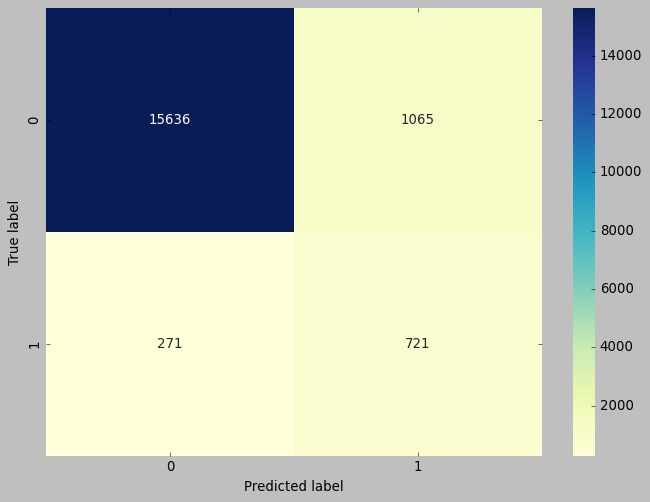

In [103]:
rfc=RandomForestClassifier(n_jobs=-1)
rfc.fit(xtrain, ytrain)
ypred=tree.predict(xtest)
y_train_pred=tree.predict(xtrain)
print("Accuracy of train data:",accuracy_score(ypred,ytest))
print("Accuracy of test data:",accuracy_score(y_train_pred,ytrain))
print("Confusion matrix:\n",confusion_matrix(ypred,ytest))
var=confusion_matrix(ypred,ytest)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(var, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicted label')
plt.ylabel('True label')
print("Accuracy:" ,((var[0,0]+var[1,1])/(var[0,0]+var[0,1]+var[1,0]+var[1,1])))
print("sensitivity/Recall: ",var[0,0]/(var[0,0]+var[0,1]))
print("precision: ",var[0,0]/(var[0,0]+var[1,0]))
print("specificity: ",var[1,1]/(var[1,0]+var[1,1]))
p = var[0,0]/(var[0,0]+var[1,0])
r = var[0,0]/(var[0,0]+var[0,1])
c = 2*((p*r)/(p+r))
print("F1 score:",c)
print(classification_report(ypred,ytest))
print("accuracy: ",accuracy_score(ypred,ytest))
print("confusion matrix: ",confusion_matrix(ypred,ytest))

In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
xtrain,xtest,ytrain,ytest=train_test_split(newX,y,test_size=0.3)
xtrain.shape,xtest.shape

((41283, 10), (17693, 10))

Accuracy of train data: 0.9266941728367151
Accuracy of test data: 0.9113194293050408
Confusion matrix:
 [[15676  1035]
 [  262   720]]
sensitivity/Recall:  0.9380647477709293
precision:  0.9835613000376459
specificity:  0.7331975560081466
F1 score: 0.9602744341327453


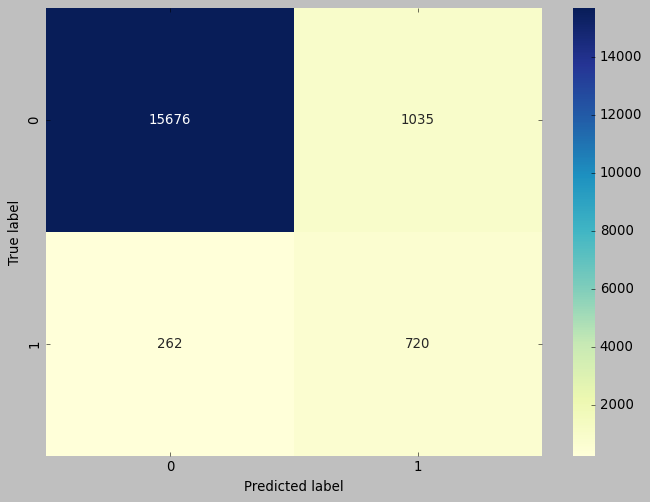

In [105]:
svc=SVC(kernel="linear")
svc.fit(xtrain, ytrain)
ypred=tree.predict(xtest)
y_train_pred=svc.predict(xtrain)
print("Accuracy of train data:",accuracy_score(ypred,ytest))
print("Accuracy of test data:",accuracy_score(y_train_pred,ytrain))
print("Confusion matrix:\n",confusion_matrix(ypred,ytest))
var=confusion_matrix(ypred,ytest)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(var, annot=True, cmap="YlGnBu", fmt="g")
plt.xlabel('Predicted label')
plt.ylabel('True label')
print("Accuracy:" ,((var[0,0]+var[1,1])/(var[0,0]+var[0,1]+var[1,0]+var[1,1])))
print("sensitivity/Recall: ",var[0,0]/(var[0,0]+var[0,1]))
print("precision: ",var[0,0]/(var[0,0]+var[1,0]))
print("specificity: ",var[1,1]/(var[1,0]+var[1,1]))
p = var[0,0]/(var[0,0]+var[1,0])
r = var[0,0]/(var[0,0]+var[0,1])
c = 2*((p*r)/(p+r))
print("F1 score:",c)

In [106]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size = 0.3, random_state = 0)

In [107]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.metrics import Precision, Recall
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
newX = np.array(ct.fit_transform(newX))

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',Precision(), Recall()])


In [110]:
ann.fit(X_train, tf.keras.utils.to_categorical(y_train), batch_size = 32, epochs = 100)
pred=ann.predict(X_test)

Epoch 1/100
1291/1291 [==============================] - 3s 1ms/step - loss: 0.3227 - accuracy: 0.8733 - precision: 0.8627 - recall: 0.8760
Epoch 2/100
1291/1291 [==============================] - 2s 1ms/step - loss: 0.2200 - accuracy: 0.9244 - precision: 0.9282 - recall: 0.9185
Epoch 3/100
1291/1291 [==============================] - 2s 1ms/step - loss: 0.2130 - accuracy: 0.9258 - precision: 0.9270 - recall: 0.9244
Epoch 4/100
1291/1291 [==============================] - 2s 1ms/step - loss: 0.2094 - accuracy: 0.9269 - precision: 0.9272 - recall: 0.9261
Epoch 5/100
1291/1291 [==============================] - 2s 1ms/step - loss: 0.2072 - accuracy: 0.9270 - precision: 0.9275 - recall: 0.9265
Epoch 6/100
1291/1291 [==============================] - 2s 2ms/step - loss: 0.2062 - accuracy: 0.9276 - precision: 0.9275 - recall: 0.9275
Epoch 7/100
1291/1291 [==============================] - 2s 1ms/step - loss: 0.2053 - accuracy: 0.9277 - precision: 0.9277 - recall: 0.9275
Epoch 8/100
1291/129

In [111]:
y_pred=np.argmax(pred,axis=1)
#y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report( y_pred, y_test))
print("accuracy: ",accuracy_score(y_pred, y_test))
print("confusion matrix: ",confusion_matrix(y_pred , y_test))


              precision    recall  f1-score   support

           0       0.99      0.94      0.96     16782
           1       0.41      0.80      0.54       911

    accuracy                           0.93     17693
   macro avg       0.70      0.87      0.75     17693
weighted avg       0.96      0.93      0.94     17693

accuracy:  0.9291810320465721
confusion matrix:  [[15711  1071]
 [  182   729]]


In [112]:
var=confusion_matrix(y_pred, y_test)
print("specificity: ",var[1,1]/(var[1,0]+var[1,1]))
print("sensitivity/Recall: ",var[0,0]/(var[0,0]+var[0,1]))
print("precision: ",var[0,0]/(var[0,0]+var[1,0]))
p = var[0,0]/(var[0,0]+var[1,0])
r = var[0,0]/(var[0,0]+var[0,1])
c = 2*((p*r)/(p+r))
print("F1 score:",c)


specificity:  0.8002195389681669
sensitivity/Recall:  0.9361816231676796
precision:  0.9885484175423143
F1 score: 0.9616526396327467
